In [3]:
import numpy as np
import pandas as pd
from gensim.parsing.preprocessing import preprocess_string,preprocess_documents
from gensim import corpora,models, similarities
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, StratifiedKFold
from sklearn import preprocessing
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier

color = sns.color_palette()
%matplotlib inline
from sklearn import metrics

In [4]:
df1 = pd.read_csv('newdfcleaned.csv', encoding="ISO-8859-1")
df1 = df1.drop('Unnamed: 0', 1)
df1.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [5]:
df2 = pd.read_csv('essay_features.csv')
df2.fillna(0, inplace=True)
full_df = df1.merge(df2, how = 'left', left_on='essay_id', right_on='essay_id')
full_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,#_prop,$_prop,''_prop,(_prop,...,with_prop,within_prop,without_prop,would_prop,yet_prop,you_prop,your_prop,yours_prop,yourself_prop,yourselves_prop
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8,0.0,0.0,0.000000,0.002591,...,0.018135,0.0,0.000000,0.002591,0.0,0.023316,0.028497,0.002591,0.0,0.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,0.0,0.0,0.000000,0.000000,...,0.023707,0.0,0.000000,0.002155,0.0,0.015086,0.008621,0.000000,0.0,0.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,0.0,0.0,0.000000,0.000000,...,0.006390,0.0,0.000000,0.000000,0.0,0.009585,0.000000,0.000000,0.0,0.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,0.0,0.0,0.001637,0.000000,...,0.000000,0.0,0.001637,0.011457,0.0,0.001637,0.001637,0.000000,0.0,0.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,0.0,0.0,0.000000,0.000000,...,0.007737,0.0,0.000000,0.017408,0.0,0.007737,0.003868,0.000000,0.0,0.0


In [9]:
essay_df = full_df[["rater1_domain1", "essay_set"]]

In [32]:
plt.style.use("seaborn-whitegrid")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001DC6E438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002147ACC0>]], dtype=object)

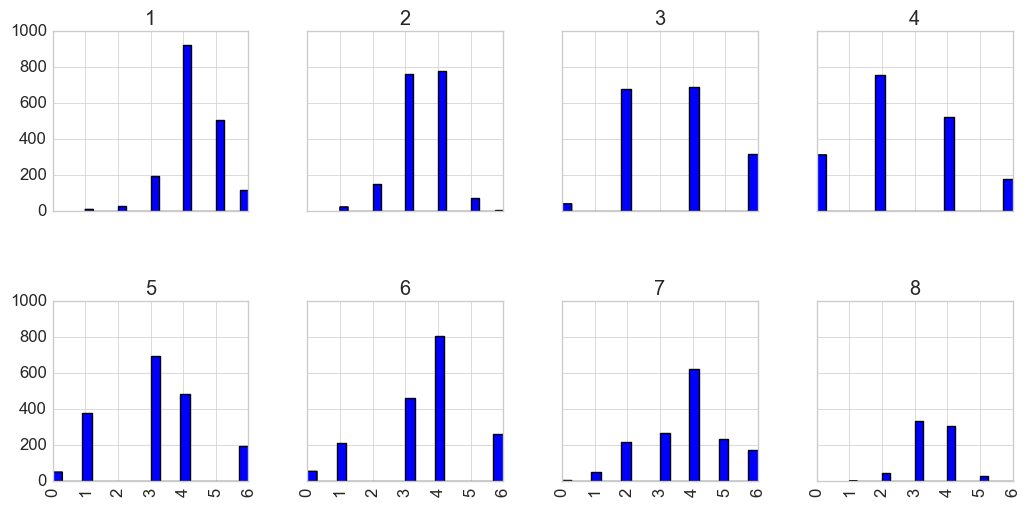

In [33]:
full_df["rater1_domain1"].hist(by=full_df["essay_set"],bins=20, layout = (2,4),figsize=(12,6),sharex=True,sharey=True)

In [60]:
plt.style.use('ggplot')

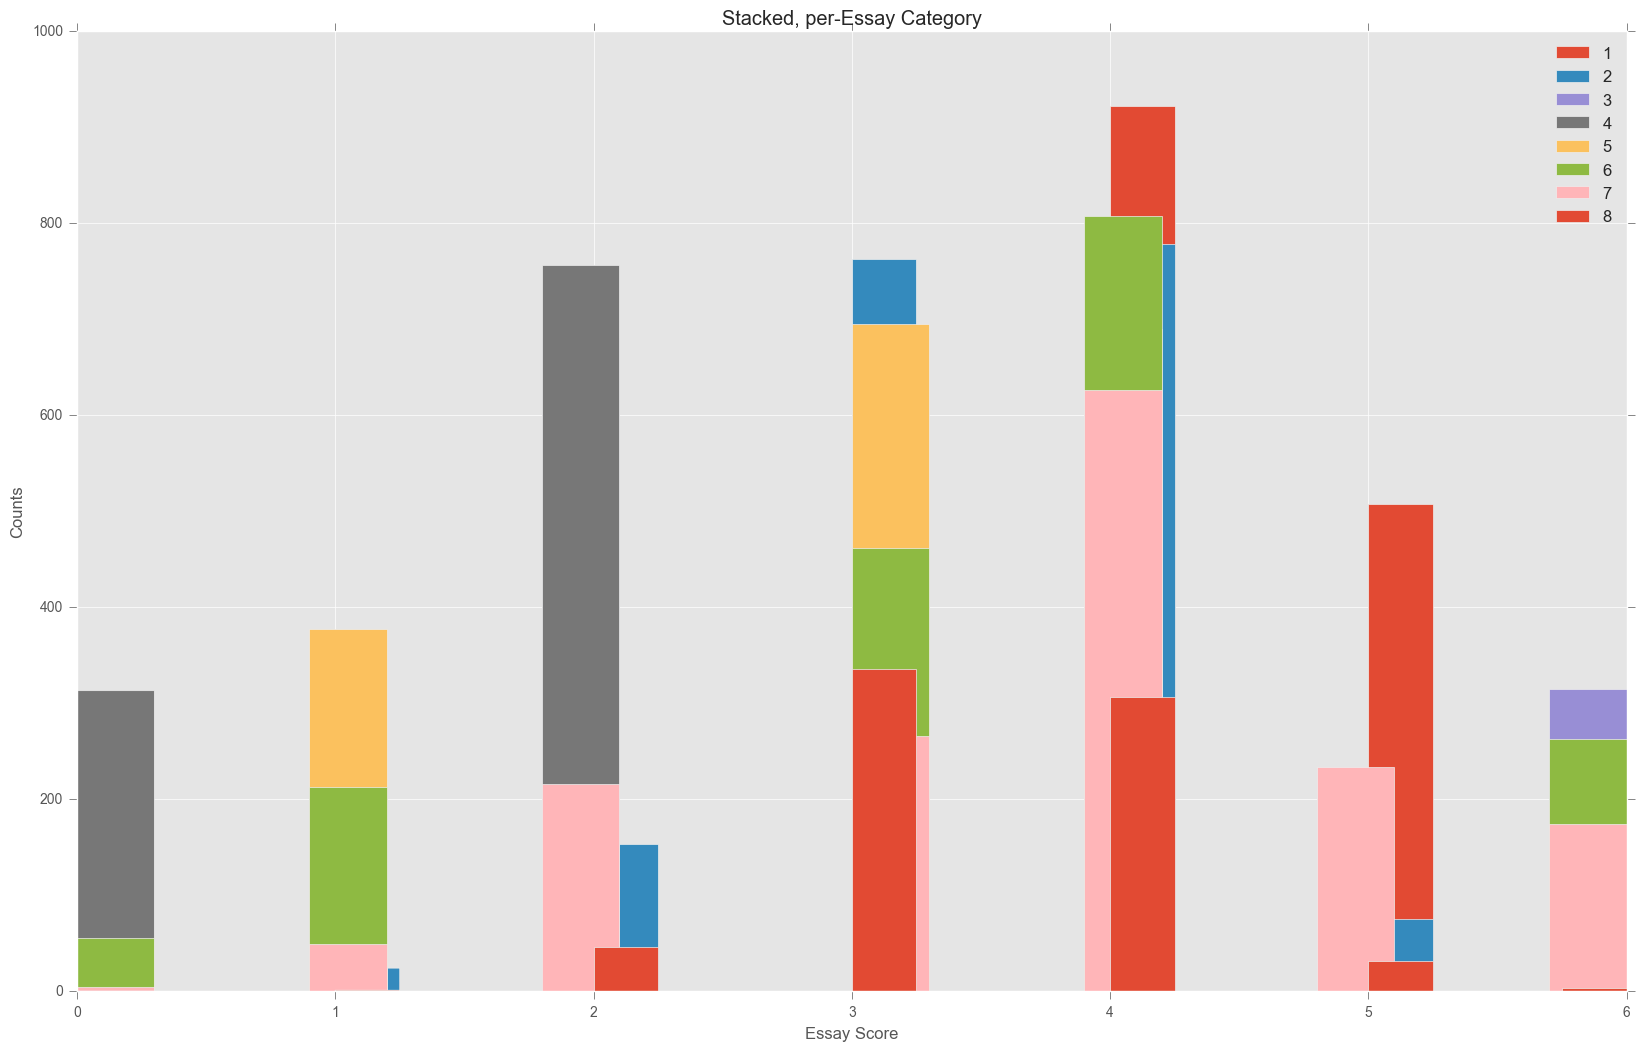

In [71]:
stackedHistogram = full_df["rater1_domain1"].groupby(full_df["essay_set"]).hist(bins=20, figsize = (20,12))
plt.xlabel("Essay Score")
plt.ylabel("Counts")
plt.legend(stackedHistogram.index)
plt.title("Stacked, per-Essay Category")

In [65]:
df_feats = full_df[["rater1_domain1", 'average_paragraph_length', 'avg_syllables', 'avg_entropies', 'essay_set',
                   u'the_prop', u'average_sentence_lengths', u'to_prop', u'how_prop', u'any_prop',
       u'._prop', u'in_prop',u'and_prop', u'a_prop', u'really_prop', u'take_prop', u'me_prop',
       u'that_prop', u'of_prop', u'through_prop', u'was_prop', u'some_prop',u'because_prop',u'have_prop', 
                    u'very_prop', u'can_prop', u'will_prop', u'could_prop', u'out_prop', u'but_prop',]]

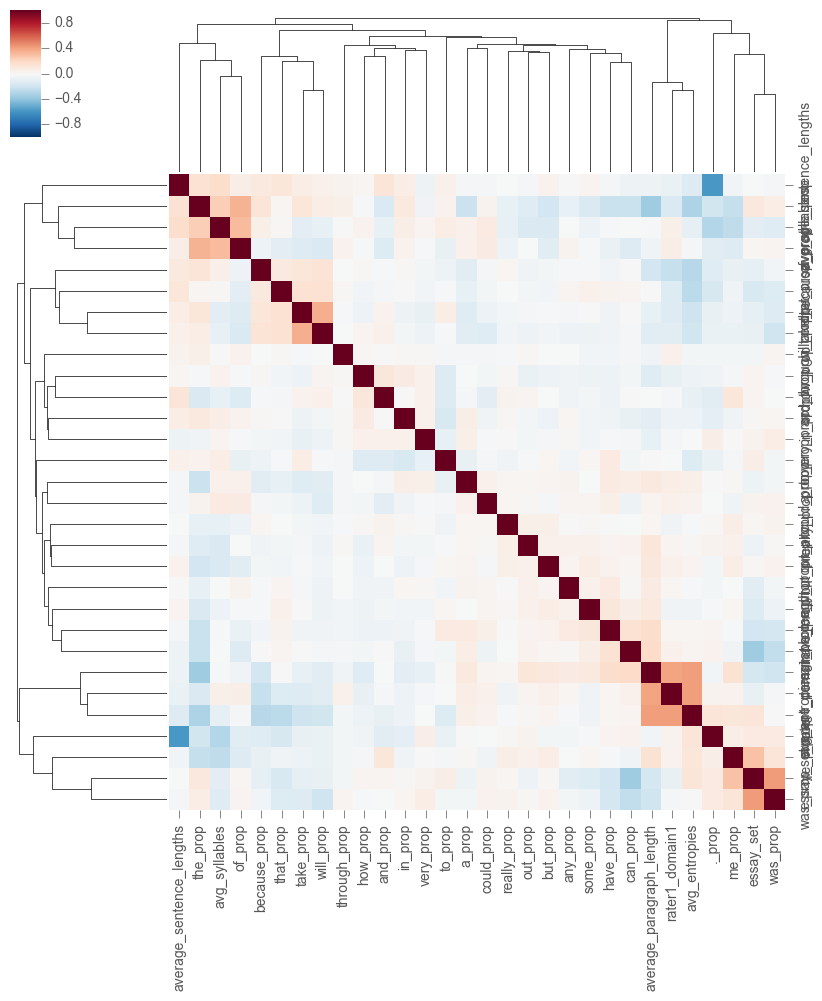

In [73]:
sns.clustermap(df_feats.corr())

In [75]:
df_NLP_prop = full_df[["rater1_domain1", 'essay_set',u'NN_prop',u'DT_prop',u'VBD_prop', 
                    u'VB_prop', u'IN_prop',u'RB_prop', u'TO_prop',  u'JJ_prop', u'NNS_prop', u'PRP_prop',
      u'VBP_prop', u'VBN_prop',u'WRB_prop', u'PRP$_prop', u'VBZ_prop', u'VBG_prop', 'RBR_prop', 
                       'JJR_prop','WDT_prop', u'CD_prop',u'EX_prop', u'POS_prop', u'RP_prop']]

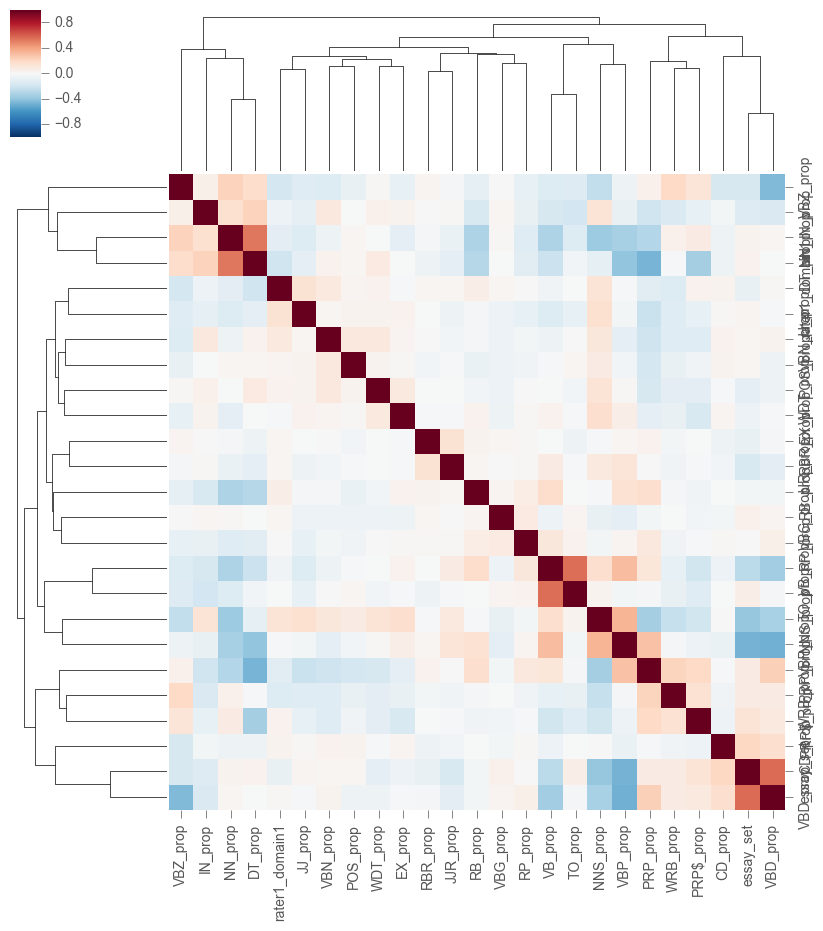

In [76]:
sns.clustermap(df_NLP_prop.corr())